### Learning curve

In [14]:
import numpy as np
import pandas as pd
import umap
import umap.plot
import matplotlib.pyplot as plt

dags = {'BayesDAGEstimator - uniform': [], 'BayesDAGEstimator - entropy': [], 'BayesDAGEstimator - eces': [], 'BayesDAGEstimator - bald': [], 'BayesDAGEstimator - ebald': [],
        'GFlowEstimator - uniform': [], 'GFlowEstimator - entropy': [], 'GFlowEstimator - eces': [], 'GFlowEstimator - bald': [], 'GFlowEstimator - ebald': []}

In [2]:
# for key in dags.keys():
#     for epoch in range(10):
#         dags[key].append([np.load(f'dag_logs/{key}/epoch_{epoch}/dag_{i}.npy') for i in range(64)])

### UMAP

In [3]:
def load_knockouts(file):
    ko = pd.read_csv(file, sep='\t', header=0)
    ko = ko.to_numpy()[:,1:]
    ko_dict = {i+1 : ko[i*21:(i+1)*21] for i in range(ko.shape[1])}
    return ko_dict
    
timeseries = np.loadtxt(f'gnw_example/Example_dream4_timeseries.tsv', skiprows=1)[:,1:]
ko_dict = load_knockouts('gnw_example/Example_knockout_timeseries.tsv')

full_data = np.concatenate([timeseries, np.concatenate(list(ko_dict.values()))])
labels = np.concatenate([np.zeros(timeseries.shape[0]), np.concatenate([np.ones(ko_dict[i].shape[0]) * i for i in ko_dict.keys()])])

In [4]:
mapper = umap.UMAP().fit(full_data)

/tmp/ipykernel_104745/3708360091.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=None)


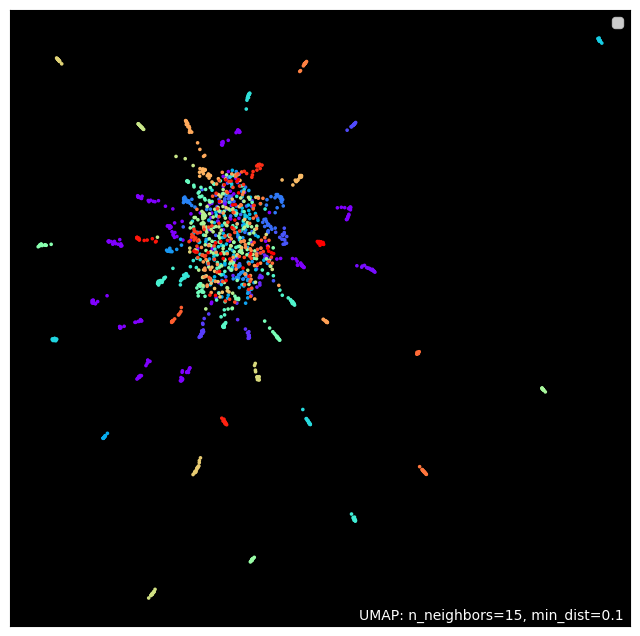

In [15]:
# umap.plot.output_notebook()

umap.plot.points(mapper, labels=labels, theme='fire', width=800, height=800)
plt.legend(loc=None)